<p>Notes found <a href="https://colab.research.google.com/drive/1IlrlS3bB8t1Gd5Pogol4MIwUxlAjhWOQ#forceEdit=true&sandboxMode=true">here</a></p>
<p>Video found <a href="https://www.youtube.com/watch?v=tPYj3fFJGjk&list=WL&index=5&t=11941s&ab_channel=freeCodeCamp.org">here</a></p>

In [42]:
import gym
import numpy as np
import time

<h1>Q Learning</h1>

<h2>Frozen Lake v1</h2>

<p>Frozen Lake Environment</p>

In [3]:
# Load environment
env = gym.make('FrozenLake-v1')  # we are going to use the FrozenLake enviornment

In [4]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [32]:
env.reset()  # reset enviornment to default state

0

In [39]:
action = env.action_space.sample()  # get a random action
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [40]:
env.render()   # render the GUI for the enviornment

  (Right)
SFFF
FHFH
FFFH
HFFG


<p>Building the Q Table</p>

In [43]:
env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [45]:
# Initialise blank matrix
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q.shape

(16, 4)

In [50]:
# Constants
EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96  # Discount rate

RENDER = False # if you want to see training set to true

<p>Picking an Action</p>

In [47]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

<p>Overall</p>

In [53]:
rewards = [] # For plotting rewards later to measure performance

for episode in range(EPISODES):

    state = env.reset()  # Reset environment
    for _ in range(MAX_STEPS):
    
        if RENDER:
            env.render()

        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])  # Update Q value

        state = next_state

        if done: 
            rewards.append(reward)
            epsilon -= 0.001
            break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")
# and now we can see our Q values!

[[1.15445751e-01 2.53349914e-02 2.65940634e-02 2.67007920e-02]
 [2.25142837e-03 9.20306226e-03 1.61950271e-03 1.69239323e-01]
 [4.35489675e-03 1.02671607e-02 1.05046389e-02 1.74300909e-01]
 [3.49341171e-03 9.61942029e-03 2.97264550e-03 1.23772345e-01]
 [1.20193517e-01 1.08709089e-02 1.61341250e-02 8.06535773e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.39630596e-02 1.84255117e-05 2.90188323e-05 9.49762201e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.54336229e-03 9.84259964e-03 1.53016774e-02 2.09310162e-01]
 [1.02639651e-02 1.81965867e-01 3.48346703e-04 6.48492117e-03]
 [6.99291300e-01 1.12655421e-03 9.99834804e-04 7.91670139e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.96710077e-03 5.34830038e-03 5.27228814e-01 7.17884596e-02]
 [1.74492081e-01 9.72710338e-01 1.17087616e-01 1.75056279e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

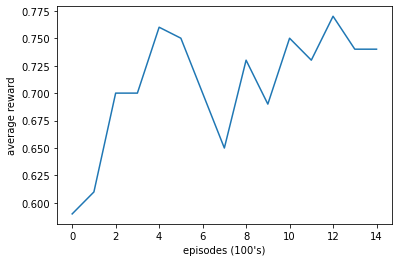

In [54]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()